# Acceleration

## Shanks Transformation

Shanks transformation is a non-linear series acceleration method to increase the rate of convergence of a sequence. This method is named after Daniel Shanks.

We introduce a convergent sequence $\{a_n\}_{n\in\mathbb{N}}$, the sum of the first $i$ terms can be described as $ S_i = \sum\limits_{n=0}^{i}a_n $, and forms a new sequence $\{S_i\}_{i\in\mathbb{N}}$.

Provided the series converges, $S_i$ will also converge to $S$ as $n→∞$. The Shanks transformation $L(S_i)$ is defined by:

$$ L(S_i) = S_{i+1} - \frac{(S_{i+1}-S_i)^2}{(S_{i+1}-S_i)-(S_i-S_{i-1})} $$

$$ L(S_i) = \frac{S_{i+1}S_{i-1}-S_i^2}{S_{i+1}-2S_i+S_{i-1}} $$


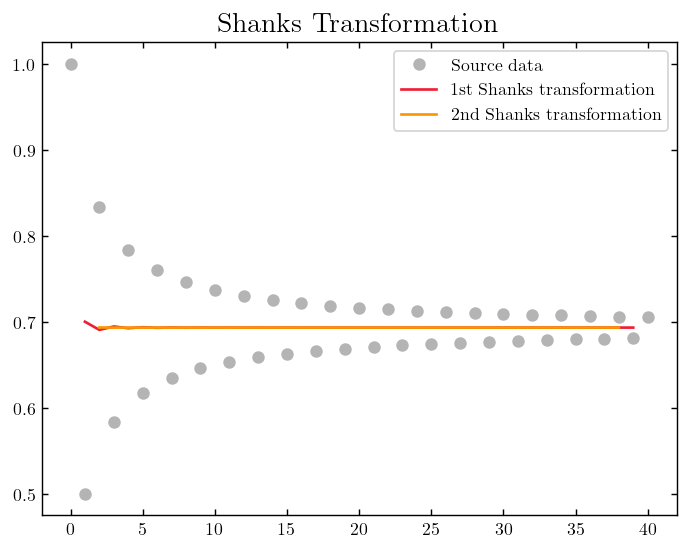

In [1]:
# Shanks Transformation

import numpy as np
import matplotlib.pyplot as plt

X,Y = np.loadtxt('../Appendix Data Manipulation/Data/Progressive1.dat', unpack=True)
count = len(X)

# 1st Shanks transformation
L1 = np.empty(count)
for i in range(0,count):
    if i > 0 and i < count-1:
        L1[i] = (Y[i]**2-Y[i-1]*Y[i+1])/(2*Y[i]-Y[i-1]-Y[i+1])
    else:
        L1[i] = 0
    i = i + 1

# 2nd Shanks transformation
L2 = np.empty(count)
for i in range(0,count):
    if i > 0 and i < count-1:
        L2[i] = (L1[i]**2-L1[i-1]*L1[i+1])/(2*L1[i]-L1[i-1]-L1[i+1])
    else:
        L2[i] = 0
    i = i + 1

# 3rd Shanks transformation
L3 = np.empty(count)
for i in range(0,count):
    if i > 0 and i < count - 1:
        L3[i] = (L2[i]**2-L2[i-1]*L2[i+1])/(2*L2[i]-L2[i-1]-L2[i+1])
    else:
        L3[i] = 0
    i = i + 1

# 4th Shanks transformation
L4 = np.empty(count)
for i in range(0,count):
    if i > 0 and i < count - 1:
        L4[i] = (L3[i]**2-L3[i-1]*L3[i+1])/(2*L3[i]-L3[i-1]-L3[i+1])
    else:
        L4[i] = 0     
    i = i + 1

# 5th Shanks transformation
L5 = np.empty(count)
for i in range(0,count):
    if i > 0 and i < count - 1:
        L5[i] = (L4[i]**2-L4[i-1]*L4[i+1])/(2*L4[i]-L4[i-1]-L4[i+1])
    else:
        L5[i] = 0     
    i = i + 1

# 6th Shanks transformation
L6 = np.empty(count)
for i in range(0,count):
    if i > 0 and i < count - 1:
        L6[i] = (L5[i]**2-L5[i-1]*L5[i+1])/(2*L5[i]-L5[i-1]-L5[i+1])
    else:
        L6[i] = 0     
    i = i + 1

plt.figure(dpi=128); params = {"text.usetex": True, "font.family": "serif", "mathtext.fontset": "cm", "axes.titlesize": 16, "axes.labelsize": 14, "figure.facecolor": "w"}
plt.rcParams.update(params)
plt.tick_params(direction="in",top=True,right=True,bottom=True,left=True)

plt.title("Shanks Transformation")
plt.plot(X, Y, "o", c="#B4B4B4", label="Source data")
plt.plot(X[1:len(L1)-1], L1[1:len(L1)-1], c="#F01E32", label="1st Shanks transformation")
plt.plot(X[2:len(L1)-2], L2[2:len(L1)-2], c="#FA9600", label="2nd Shanks transformation")
# plt.plot(X[3:len(L1)-3], L3[3:len(L1)-3], c="#FFD700", label="3rd Shanks transformation")
# plt.plot(X[4:len(L1)-4], L4[4:len(L1)-4], c="#50BE3C", label="4th Shanks transformation")
# plt.plot(X[5:len(L1)-4], L5[5:len(L1)-4], c="#008CF0", label="5th Shanks transformation")
# plt.plot(X[6:len(L1)-4], L6[6:len(L1)-4], c="#8C64F0", label="6th Shanks transformation")
plt.legend(loc="best")



## Richardson Extrapolation

Richardson extrapolation is named because of Lewis Fry Richardson, which is a sequence acceleration method used to improve the rate of convergence of a sequence of estimates of some value $A^*=\lim\limits_{n→0}A(n)$.

$$ R_1(n) = \frac{(n+1)A(n+1)-h*A(n)}{1!} $$

$$ R_2(h) = \frac{(n+2)^2A(n+1)-2(n+1)^2A(n+1)+n^2A(n)}{2!} $$


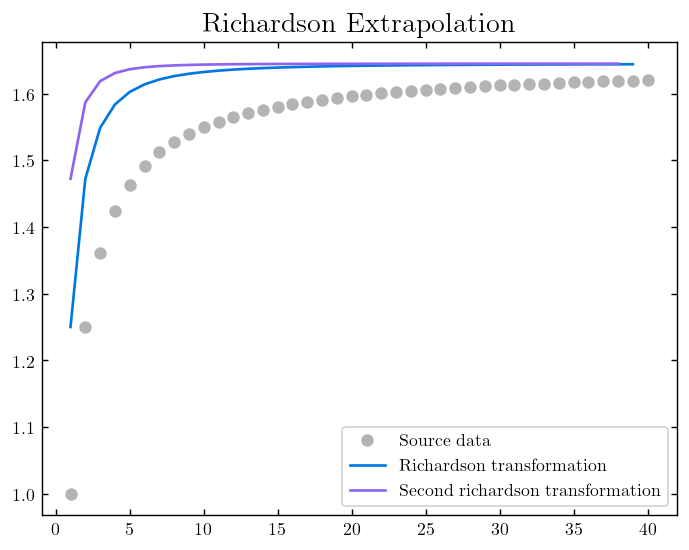

In [2]:
# Richardson Extrapolation

import numpy as np
import matplotlib; import matplotlib.pyplot as plt

X,Y = np.loadtxt('../Appendix Data Manipulation/Data/Progressive0.dat', unpack=True)
count = len(X)

def RE1(Y):
    R1 = np.ones(count)
    for i in range(0, count - 1):
        if i < count - 1 :
            R1[i] = ((i+1)*Y[i+1]-i*Y[i])/np.math.factorial(1)
        else:
            R1[i] = 0
        i = i + 1
    return R1

def RE2(Y):
    R2 = np.ones(count)
    for i in range(0, count - 2):
        if i < count - 2 :
            R2[i] = ((i+2)**2*Y[i+2]-2*(i+1)**2*Y[i+1]+i**2*Y[i])/np.math.factorial(2)
        else:
            R2[i] = 0
        i = i + 1
    return R2

U1 = RE1(Y)
U2 = RE2(Y)

plt.figure(dpi=128); params = {"text.usetex": True, "font.family": "serif", "mathtext.fontset": "cm", "axes.titlesize": 16, "axes.labelsize": 14, "figure.facecolor": "w"}
matplotlib.rcParams.update(params)
plt.tick_params(direction="in",top=True,right=True,bottom=True,left=True)

plt.title("Richardson Extrapolation")
plt.plot(X, Y, "o", c="#B4B4B4", label="Source data")
plt.plot(X[0:len(U1)-1], U1[0:len(U1)-1], c="#0078E1", label="Richardson transformation")
plt.plot(X[0:len(U2)-2], U2[0:len(U1)-2], c="#8C64F0", label="Second richardson transformation")
plt.legend(loc="best")